# Première partie

1) Traiter les données manquantes, aberrantes, comprendre les variables ✅

2) Statistiques descriptives simples : histo, etc ✅

3) Seine-maritime vs france

4) Prédiction (attention variables catégorielles non ordonnées)

5) Ajouter mois naissance, pays naissance parents ✅

6) Tracer histo age pere et mere sur le meme graphique ✅

7) Faire un scatter plot et calculer la corrélation, et la droite de régression linéaire ✅

8) Faire un test de normalité pour chaque histo mere et pere 

9) Nombre de naissances : histogramme age mère par nb de naissance (1,2,3) ✅

10) Tableau d’effectifs (à la manière du khi deux) : sexe bébé + 1 autre variable ✅

11) Etude à 2 variables : catégorie (age), lieu de domicile ou catégorie (âge) et nationalité

# Extraction des données

In [28]:
from dbfread import DBF
import pandas as pd

df =pd.read_csv("fichiers/etatcivil2022_nais2022_csv/FD_NAIS_2022.csv",sep=";", low_memory = False) 
data_alias = {"ACCOUCHR" : "Conditions de l’accouchement", "MNAIS": "Mois de naissance de l'enfant", "AGEMERE" : "Age de la mère", "AGEPERE" : "Age du père", "INDNATM" : "Nationnalité de la mère","INDNATP" : "Nationnalité du père" , "AMAR" : "Année de mariage des parents", "DEPDOM": "Département de domicile de la mère", "DEPNAIS" : "Département de naissance" , "NBENF" : "Nombre d'enfant issu de l'accouchement", "SEXE" : "Sexe de l'enfant"}

In [29]:
data_alias

{'ACCOUCHR': 'Conditions de l’accouchement',
 'MNAIS': "Mois de naissance de l'enfant",
 'AGEMERE': 'Age de la mère',
 'AGEPERE': 'Age du père',
 'INDNATM': 'Nationnalité de la mère',
 'INDNATP': 'Nationnalité du père',
 'AMAR': 'Année de mariage des parents',
 'DEPDOM': 'Département de domicile de la mère',
 'DEPNAIS': 'Département de naissance',
 'NBENF': "Nombre d'enfant issu de l'accouchement",
 'SEXE': "Sexe de l'enfant"}

# Traitement des données abbérantes et manquantes

In [30]:
df

,ANAIS,ACCOUCHR,AGEMERE,AGEXACTM,DEPDOM,DEPNAIS,INDLNM,INDNATM,MNAIS,NBENF,ORIGINOM,SEXE,TUCOM,TUDOM
0,2022,ES,29,28,01,69,1,1,1,1,1.0,1,P,0
1,2022,ES,32,31,01,71,1,1,7,1,1.0,2,P,0
2,2022,ES,29,28,01,01,1,1,8,1,1.0,1,P,0
3,2022,ES,27,26,01,01,1,1,9,1,1.0,2,P,0
4,2022,ES,35,35,01,69,1,1,10,1,1.0,2,P,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725992,2022,ES,33,33,99,34,4,2,12,1,2.0,2,NaN,9
725993,2022,ES,33,33,99,75,1,1,12,1,1.0,2,NaN,9
725994,2022,ES,17,17,99,59,4,2,12,2,1.0,1,NaN,9
725995,2022,ES,17,17,99,59,4,2,12,2,1.0,1,NaN,9


Dans le cadre de l'analyse de nos données de naissance nous allons travailler avec 12 variables et plus de 742 000 observations.

## Traitement de nos données manquantes

In [31]:
missing_v = df.isnull().sum()
missing_v

ANAIS          0
ACCOUCHR     693
AGEMERE        0
AGEXACTM       0
DEPDOM         0
DEPNAIS        0
INDLNM         0
INDNATM        0
MNAIS          0
NBENF          0
ORIGINOM     693
SEXE           0
TUCOM       1148
TUDOM          0
dtype: int64

La seule variable avec des valeurs manquantes est ACCOUCHR, avec 761 valeurs manquantes. Pour les autres variables, il n'y a pas de valeurs manquantes signalées.

In [32]:
df["ACCOUCHR"] = df["ACCOUCHR"].fillna("inconnu")
df["ORIGINOM"] = df["ORIGINOM"].fillna("inconnu")
df["TUCOM"] = df["TUCOM"].fillna("inconnu")

In [33]:
missing_v = df.isnull().sum()
missing_v

ANAIS       0
ACCOUCHR    0
AGEMERE     0
AGEXACTM    0
DEPDOM      0
DEPNAIS     0
INDLNM      0
INDNATM     0
MNAIS       0
NBENF       0
ORIGINOM    0
SEXE        0
TUCOM       0
TUDOM       0
dtype: int64

In [34]:
df

,ANAIS,ACCOUCHR,AGEMERE,AGEXACTM,DEPDOM,DEPNAIS,INDLNM,INDNATM,MNAIS,NBENF,ORIGINOM,SEXE,TUCOM,TUDOM
0,2022,ES,29,28,01,69,1,1,1,1,1.0,1,P,0
1,2022,ES,32,31,01,71,1,1,7,1,1.0,2,P,0
2,2022,ES,29,28,01,01,1,1,8,1,1.0,1,P,0
3,2022,ES,27,26,01,01,1,1,9,1,1.0,2,P,0
4,2022,ES,35,35,01,69,1,1,10,1,1.0,2,P,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725992,2022,ES,33,33,99,34,4,2,12,1,2.0,2,inconnu,9
725993,2022,ES,33,33,99,75,1,1,12,1,1.0,2,inconnu,9
725994,2022,ES,17,17,99,59,4,2,12,2,1.0,1,inconnu,9
725995,2022,ES,17,17,99,59,4,2,12,2,1.0,1,inconnu,9


Nos données manquantes ont été traitées !

## Traitement des données abérrantes

In [35]:
import pandas as pd
import numpy as np

def detect_abberation(df, n_std=3):
    mean = np.mean(df)
    std = np.std(df)

    lower_limit = mean - (n_std * std)
    upper_limit = mean + (n_std * std)

    return df[(df < lower_limit) | (df > upper_limit)]

aber_agemere = detect_abberation(df['AGEXACTM'])
aber_agemere

Series([], Name: AGEXACTM, dtype: int64)

Il n'y a aucune valeur abberante dans nos deux varibles père et mère s'il y'en avait, les valeurs aberrantes seraient traitées de différentes manières, telles que leur suppression ou leur remplacement par une valeur médiane ou moyenne.

### MERE 

In [36]:
moyenne = data_naissance["AGEXACTM"].mean()
print("En moyenne l'âge de la mère au moment de la naissance de l'enfant est:", moyenne)
ecart_type = data_naissance["AGEXACTM"].std()
print("avec un écart de plus ou moins", ecart_type)
print("L'âge minimal des mères est:", data_naissance['AGEXACTM'].min())
print("La mère la plus agée a", data_naissance['AGEXACTM'].max(), "ans")

En moyenne l'âge de la mère au moment de la naissance de l'enfant est: 30.7479466168593
avec un écart de plus ou moins 5.394453476344521
L'âge minimal des mères est: 17
La mère la plus agée a 46 ans


### Graphique en boîte Age des parents

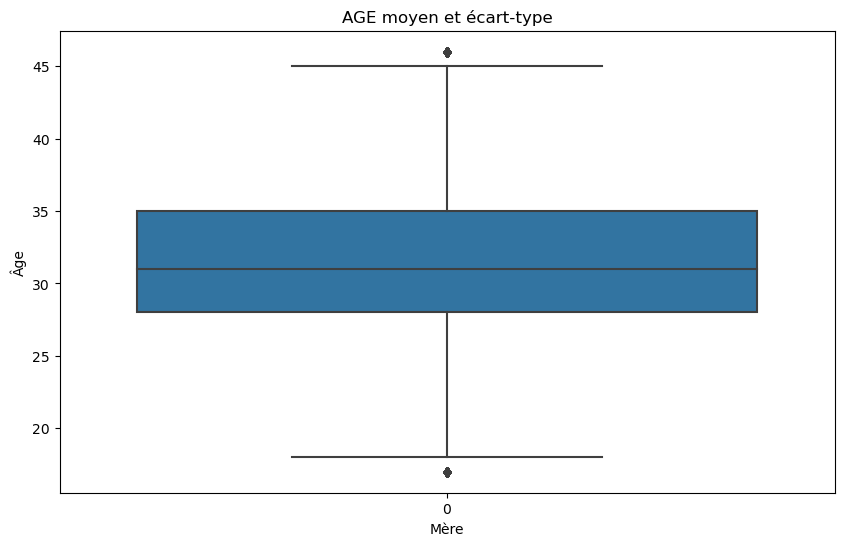

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['AGEMERE'])
plt.title('AGE moyen et écart-type')
plt.xlabel("Mère")
plt.ylabel('Âge')
plt.show()

### NBENF (Nombre d'enfants issus de l'accouchement)

In [38]:
moyenne = data_naissance["NBENF"].mean()
print(moyenne)
ecart_type = data_naissance["NBENF"].std()
print(ecart_type)
print(data_naissance['NBENF'].min())
print("Le nombre max de bébé par accouchement est", data_naissance['NBENF'].max())

1.0315125269112682
0.1780255312646165
1
Le nombre max de bébé par accouchement est 3


### Diagramme à barre age mère par nombre de naissance

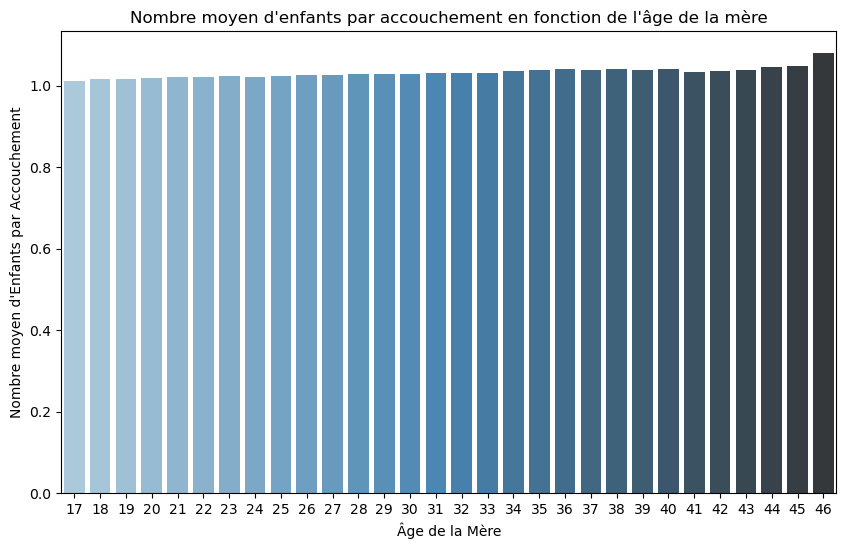

In [41]:
donnees = df.groupby('AGEMERE')['NBENF'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='AGEMERE', y='NBENF', data=donnees, palette="Blues_d")

plt.title('Nombre moyen d\'enfants par accouchement en fonction de l\'âge de la mère')
plt.xlabel('Âge de la Mère')
plt.ylabel('Nombre moyen d\'Enfants par Accouchement')

plt.show()

### SEXE

In [22]:
nombre_garcons = df[df['SEXE'] == 1].shape[0]
nombre_filles = df[df['SEXE'] == 2].shape[0]

print("Il y'a eu ", nombre_garcons, "naissances de garçons soit", (nombre_garcons*100) / len(df["SEXE"]), "%")
print("Il y'a eu ", nombre_filles, "naissances de filles soit",  (nombre_filles*100) / len(df["SEXE"]), "%")

Il y'a eu  371309 naissances de garçons soit 51.14470169986928 %
Il y'a eu  354688 naissances de filles soit 48.85529830013072 %


### Diagramme de distribution du sexe des enfants

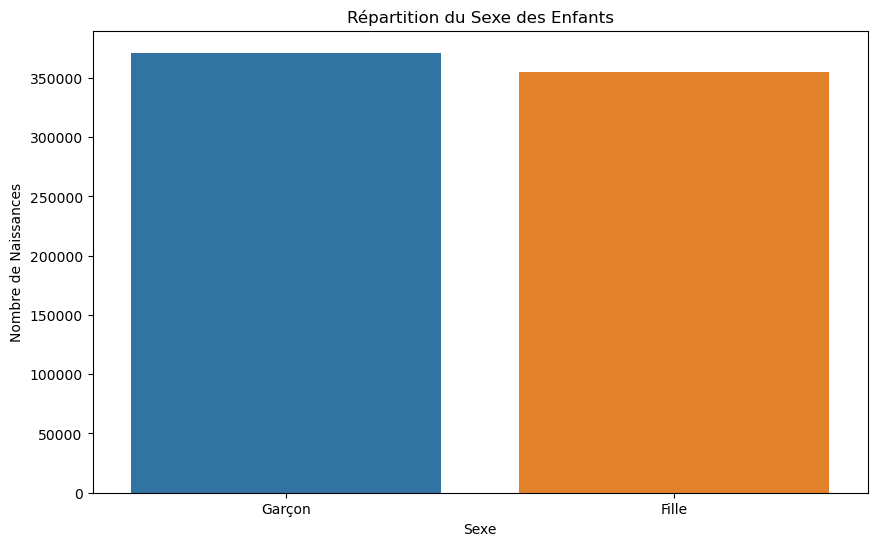

In [23]:
plt.figure(figsize=(10,6))
sex_distribution = df['SEXE'].value_counts()
sns.barplot(x=sex_distribution.index, y=sex_distribution.values)
plt.title('Répartition du Sexe des Enfants')
plt.xlabel('Sexe')
plt.ylabel('Nombre de Naissances')
plt.xticks([0, 1], ['Garçon', 'Fille'])
plt.show()

### Histogramme MERE

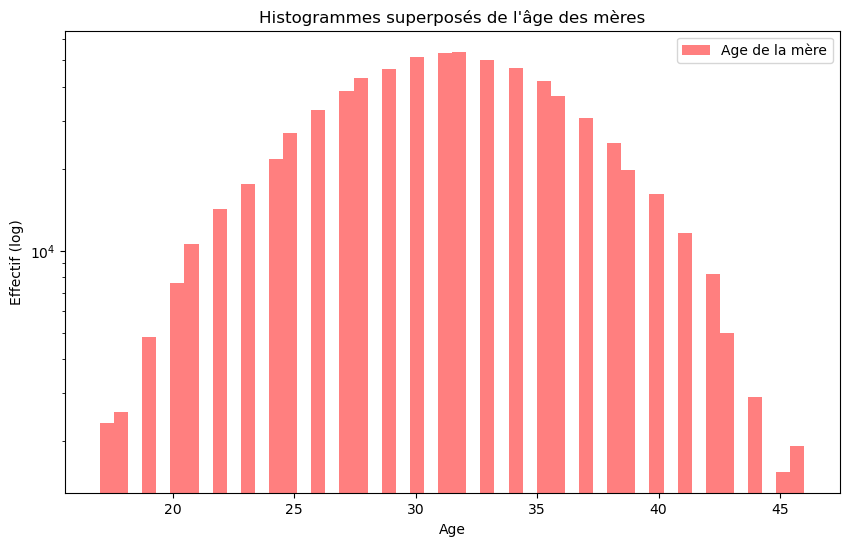

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['AGEMERE'], bins=50, alpha=0.5, label='Age de la mère', color='red', log=True)

plt.xlabel('Age')
plt.ylabel('Effectif (log)')
plt.title("Histogrammes superposés de l'âge des mères")
plt.legend()
plt.show()

### Histogramme mois de naissance

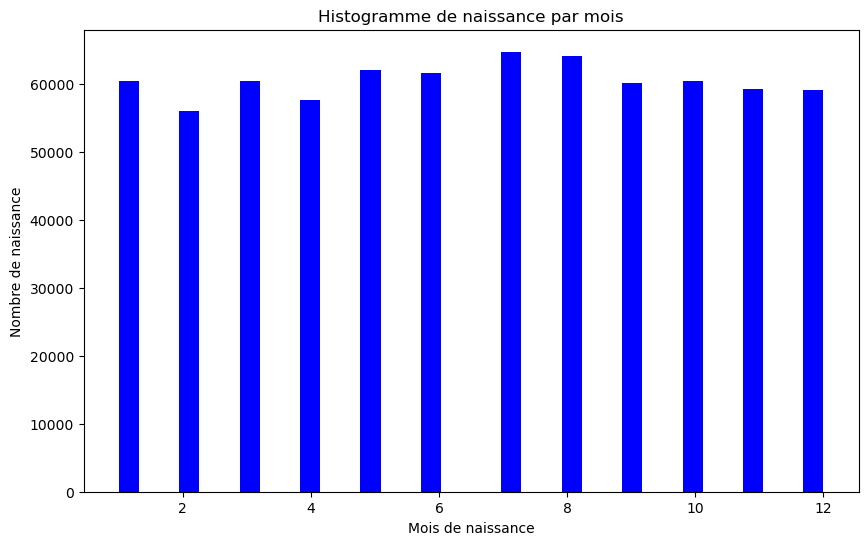

In [26]:
plt.figure(figsize=(10, 6))
df["MNAIS"].plot.hist(bins = 35, color = "blue")
"""plt.yscale("log")"""
plt.xlabel("Mois de naissance")
plt.ylabel("Nombre de naissance")
plt.title("Histogramme de naissance par mois")
plt.show()

### Graphique de dispersion avec regression

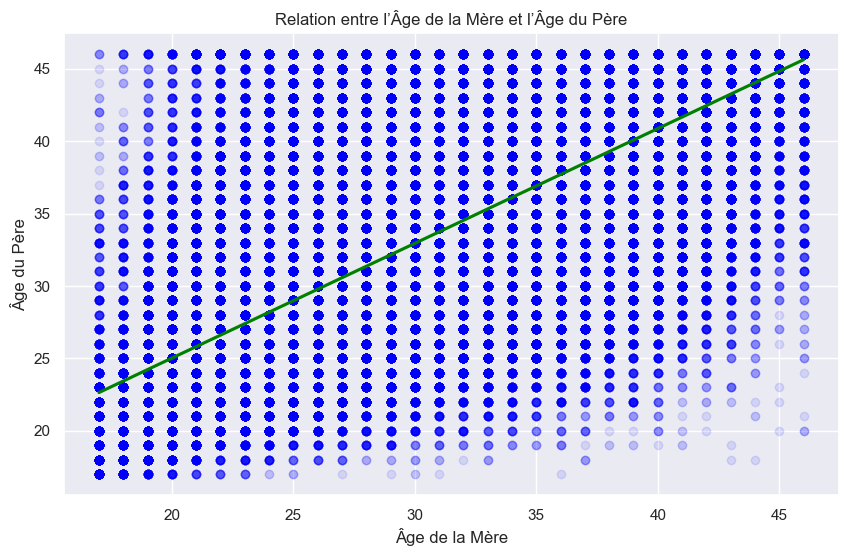

In [19]:
import seaborn as sns

sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.regplot(x='AGEMERE', y='AGEPERE', data=df, scatter_kws={'alpha':0.1, 'color':"blue"}, line_kws={'color':'green'})
plt.title('Relation entre l’Âge de la Mère et l’Âge du Père')
plt.xlabel('Âge de la Mère')
plt.ylabel('Âge du Père')

plt.show()

# equation de la droite et le coefficient de correlation

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['AGEMERE']].values
y = df['AGEPERE'].values

model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]
c = model.intercept_
print(f"L'équation de la droite est: y = {m}x + {c}")


corr, _ = pearsonr(df['AGEMERE'], df['AGEPERE'])
print("Coefficient de corrélation de Pearson:", corr)

L'équation de la droite est: y = 0.7924003841453856x + 9.171509517972762
Coefficient de corrélation de Pearson: 0.7032456978176908


Chaque point sur notre graphique représente un couple de parents, avec l'âge de la mère sur l'axe des x et celui du père sur l'axe des y.
La distribution des points nous donne une idée de la relation entre les deux variables.

### Tableau d’effectifs (à la manière du khi deux) : sexe bébé + Age de la mère pour voir si l'âge de la mère influ sur le sexe du de l'enfant 

In [21]:
from scipy.stats import chi2_contingency

bins = [16, 25, 34, 46] 
labels = ['17-25', '26-34', '35-46'] 
df['CategorieAgeMere'] = pd.cut(df['AGEMERE'], bins=bins, labels=labels, right=True)

tableau_effectifs = pd.crosstab(df['SEXE'], df['CategorieAgeMere'])

C:\Users\konta\AppData\Local\Temp\ipykernel_11676\1294174229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CategorieAgeMere'] = pd.cut(df['AGEMERE'], bins=bins, labels=labels, right=True)


In [22]:
tableau_effectifs

CategorieAgeMere,17-25,26-34,35-46
SEXE,,,
1,56020,220133,103112
2,53208,210640,98939


In [23]:
stat, p, dof, expected = chi2_contingency(tableau_effectifs)
print("Statistique du test:", stat)
print("Le degré de liberté:", dof)
print("P-value:", p)

Statistique du test: 1.8678862514246175
Le degré de liberté: 2
P-value: 0.393000998771692


In [24]:
bins = [16, 25, 34, 46] 
labels = ['17-25', '26-34', '35-46'] 
df['CategorieAgePere'] = pd.cut(df['AGEPERE'], bins=bins, labels=labels, right=True)

tableau_effectifs = pd.crosstab(df['SEXE'], df['CategorieAgePere'])

C:\Users\konta\AppData\Local\Temp\ipykernel_11676\2059532159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CategorieAgePere'] = pd.cut(df['AGEPERE'], bins=bins, labels=labels, right=True)


In [25]:
tableau_effectifs

CategorieAgePere,17-25,26-34,35-46
SEXE,,,
1,28070,187014,164181
2,26832,178189,157766


In [26]:
stat, p, dof, expected = chi2_contingency(tableau_effectifs)
print("Statistique du test:", stat)
print("Le degré de liberté:", dof)
print("P-value:", p)

Statistique du test: 3.0831489551755875
Le degré de liberté: 2
P-value: 0.21404382877132758


In [27]:
tableau2 = pd.crosstab(df["NBENF"], df["CategorieAgeMere"])
tableau2

CategorieAgeMere,17-25,26-34,35-46
NBENF,,,
1,107106,417991,194268
2,2091,12500,7612
3,31,282,171


In [28]:
stat, p, dof, expected = chi2_contingency(tableau2)
print("Statistique du test:", stat)
print("Le degré de liberté:", dof)
print("P-value:", p)

Statistique du test: 903.5729668013219
Le degré de liberté: 4
P-value: 2.8023134704521e-194


### Faire un test de normalité pour chaque histo mere et pere

In [29]:
from scipy.stats import shapiro
stat_mere, p_mere = shapiro(df['AGEMERE'].dropna())
print(f"Statistique de test pour l'âge des mères: {stat_mere}, P-value: {p_mere}")

stat_pere, p_pere = shapiro(df['AGEPERE'].dropna())
print(f"Statistique de test pour l'âge des pères: {stat_pere}, P-value: {p_pere}")

Statistique de test pour l'âge des mères: 0.9942370653152466, P-value: 0.0
Statistique de test pour l'âge des pères: 0.985175609588623, P-value: 0.0


C:\Users\konta\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Faire le test de normalité sur un effictif de moins de 5000 
Equilibré aussi les effectifs par categories dans le tableau des effetifs pour le calcul du khi2

In [31]:
df_SeineMaritime = df[df['DEPDOM'] == 76]

In [32]:
df_SeineMaritime

,ANAIS,MNAIS,ACCOUCHR,AGEMERE,AGEPERE,INDNATM,INDNATP,AMAR,DEPDOM,DEPNAIS,NBENF,SEXE,CategorieAgeMere,CategorieAgePere
